## Data Analysis on Aviation

**Business Problem**

This company wants to start a new path of industry in their company and wants to start in the industry of 
airplanes. They want to know which aircraft have less risk of having accidents for them to buy it and start operating
airplanes.

The goal for this to be achieved is to gather important data about aviation in the past to be able to make recommendations about which aircraft is better and some other factors that make these airplanes have accidents.

In [1]:
# importing what we will need
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
import warnings 

warnings.filterwarnings('ignore')

In [2]:
ls ../data

Aviation_Data.csv


In [3]:
# loading dataset that we will be using 
df = pd.read_csv('../data/Aviation_Data.csv')

## Exloring Data

Exploring data to have a better look at what data we will be working with and see if data has missing values in order to do the next step, which is data cleaning the dataset.

In [86]:
# display the first 5 rows from the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Abbr,Month
10613,20001214X35598,Accident,NYC85FNC02,1985-01-01,"HOPKINTON, NH",United States,Unknown,Unknown,LEB,"LEBANON, NH",...,0.0,0.0,IMC,Approach,Probable Cause,NaN,1985,Jan,Tue,1
10614,20001214X35495,Accident,DEN85FA055,1985-01-01,"EDGEWOOD, NM",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,IMC,Cruise,Probable Cause,NaN,1985,Jan,Tue,1
10615,20001214X35494,Accident,DCA85RA007,1985-01-01,"LA PAZ, Bolivia",Bolivia,Unknown,Unknown,LPB,LA PAZ INTERNATIONAL,...,0.0,0.0,UNK,NaN,Foreign,06-02-1995,1985,Jan,Tue,1
10616,20001214X35566,Accident,MIA85FA071,1985-01-01,"ODESSA, FL",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,0.0,VMC,Maneuvering,Probable Cause,NaN,1985,Jan,Tue,1
10617,20001214X35463,Accident,ATL85LA075,1985-01-01,"DUBLIN, NC",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,1.0,VMC,Cruise,Probable Cause,NaN,1985,Jan,Tue,1


In [39]:
#to see how many rows and columns the DataFrame has.
df.shape

(90348, 31)

In [40]:
#prints information that the DataFrame contains such as numberof colummns, columns labels, column data types,
#such as numberof colummns, columns labels, column data types, memory usage, range index, and number of cells in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [41]:
# this is used to calculate some statiscical data on numerical values of Series or DataFrame
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [42]:
# This will returns the number which has Nan values in the DataFrame
df.isna().sum()/len(df) *100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.512330
Airport.Name              41.665560
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.144508
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.468942
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

In [43]:
# will give you all the columns labels the DataFrame has
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**Some things we have notice :**
- We will be working we many columns however some columns has many missing values
- Need to convert Date to datetime
- Created a few new columns

## Data Cleaning 

From describing the data, we can see that there will be a lot of null values in each category. I will not be dropping
columns because I think we will lose a lot of information. I will be turning some category values into unknown values and some
other important categories, I will be filling them using the mode.

In [44]:
# here we will be filling up the Nan values into unknown values
df['Event.Id'].fillna('Unknown', inplace=True)
df['Accident.Number'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df['Airport.Code'].fillna('Unknown', inplace=True)
df['Airport.Name'].fillna('Unknown', inplace=True)
df['Aircraft.damage'].fillna('Unknown', inplace=True)
df['Aircraft.Category'].fillna('Unknown', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Amateur.Built'].fillna('Unknown', inplace=True)
df['FAR.Description'].fillna('Unknown', inplace=True)
df['Schedule'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('Unknown', inplace=True)
df['Air.carrier'].fillna('Unknown', inplace=True)
df['Registration.Number'].fillna('Unknown', inplace=True)
df['Latitude'].fillna('Unknown', inplace=True)
df['Longitude'].fillna('Unknown', inplace=True)

In [45]:
# here we are using the mode since in category of number of engines there is a lot of airplanes having 1 engine
number_engines_mode = df['Number.of.Engines'].mode()
df['Number.of.Engines'].fillna(value = number_engines_mode, inplace = True)

In [46]:
# converting date to datetime 
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [66]:
# create new columns and remove data before 1985 since I think is irrevalent
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Abbr'] = df['Event.Date'].dt.day_name().str[:3]
df = df[df['Year'] >= 1985]

In [68]:
#see the change we have made about
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Abbr,Month
10613,20001214X35598,Accident,NYC85FNC02,1985-01-01,"HOPKINTON, NH",United States,Unknown,Unknown,LEB,"LEBANON, NH",...,0.0,0.0,IMC,Approach,Probable Cause,NaN,1985,Jan,Tue,1
10614,20001214X35495,Accident,DEN85FA055,1985-01-01,"EDGEWOOD, NM",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,IMC,Cruise,Probable Cause,NaN,1985,Jan,Tue,1
10615,20001214X35494,Accident,DCA85RA007,1985-01-01,"LA PAZ, Bolivia",Bolivia,Unknown,Unknown,LPB,LA PAZ INTERNATIONAL,...,0.0,0.0,UNK,NaN,Foreign,06-02-1995,1985,Jan,Tue,1
10616,20001214X35566,Accident,MIA85FA071,1985-01-01,"ODESSA, FL",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,0.0,VMC,Maneuvering,Probable Cause,NaN,1985,Jan,Tue,1
10617,20001214X35463,Accident,ATL85LA075,1985-01-01,"DUBLIN, NC",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,1.0,VMC,Cruise,Probable Cause,NaN,1985,Jan,Tue,1


In [69]:
# just to see an update of what categories has some missing values now and start doing our analysis
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                     180
Latitude                      0
Longitude                     0
Airport.Code                  0
Airport.Name                  0
Injury.Severity            1000
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          5977
Engine.Type                7094
FAR.Description               0
Schedule                      0
Purpose.of.flight          6181
Air.carrier                   0
Total.Fatal.Injuries      11349
Total.Serious.Injuries    12447
Total.Minor.Injuries      11867
Total.Uninjured            5886
Weather.Condition             0
Broad.phase.of.flight     27153
Report.Status              6384
Publication.Date           8265
Year    

## Data Analysis 

Date vs. Accidents I will mainly focus on!


Analyze when accidents happen mostly and why may be the cause of them, also keeping in mind which type of aircraft
is having those accidents.

The date can also give powerful information about why there are the most accidents at those times of the year, if there are any.




In [87]:
# We will be grouping accidents that have happened in each month of every year.
accidents_per_month = df.groupby(['Month.Abbr'], as_index = False)['Event.Id'].count()
accidents_per_month

,Month.Abbr,Event.Id
0,Apr,6416
1,Aug,8772
2,Dec,4426
3,Feb,4601
4,Jan,4390
5,Jul,9466
6,Jun,8428
7,Mar,5881
8,May,7457
9,Nov,4862


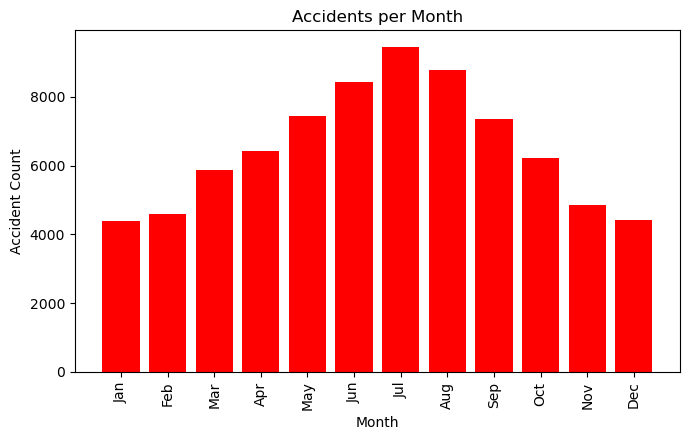

In [90]:
# Extracting data from the DataFrame
months = accidents_per_month['Month.Abbr']
accident_counts = accidents_per_month['Event.Id']

# Sorting the x label by month order
sorted_data = data.sort_values(by='Month', key=lambda x: [list(calendar.month_abbr).index(month) for month in x])

# Creating the bar graph
plt.figure(figsize=(7, 4.5))
plt.bar(sorted_data['Month'], sorted_data['Accident Count'], color='red')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Accidents per Month')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.grid(False)

# Display the graph
plt.show()


- Most accidents has happened in the months of June, July and August
- Summer time and most of the population is on vacation in the United States
- Maybe there are too many flights?

In [91]:
df['Event.Date']

10613   1985-01-01
10614   1985-01-01
10615   1985-01-01
10616   1985-01-01
10617   1985-01-01
           ...    
90343   2022-12-26
90344   2022-12-26
90345   2022-12-26
90346   2022-12-26
90347   2022-12-29
Name: Event.Date, Length: 78276, dtype: datetime64[ns]

In [94]:
# Get the number of accidents that have happened each year.
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1985,3096
1,1986,2880
2,1987,2828
3,1988,2730
4,1989,2544
5,1990,2518
6,1991,2462
7,1992,2355
8,1993,2313
9,1994,2257


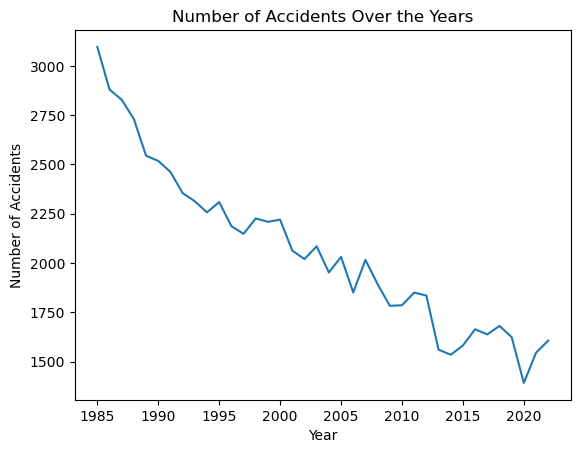

In [95]:
# Make a line graph of accidents that happen each year.
accidents_per_year = df['Year'].value_counts().sort_index()
plt.plot(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years')
plt.grid(False)
plt.show()

In [96]:
# See the monthly flight count that each year had in order to know why there were too many accidents in July, June, and August.
monthly_flights = df.groupby(['Year','Month.Abbr'])['Event.Id'].nunique()
print(monthly_flights)

Year  Month.Abbr
1985  Apr           273
      Aug           339
      Dec           172
      Feb           188
      Jan           171
                   ... 
2022  Mar           128
      May           134
      Nov            93
      Oct           136
      Sep           154
Name: Event.Id, Length: 456, dtype: int64


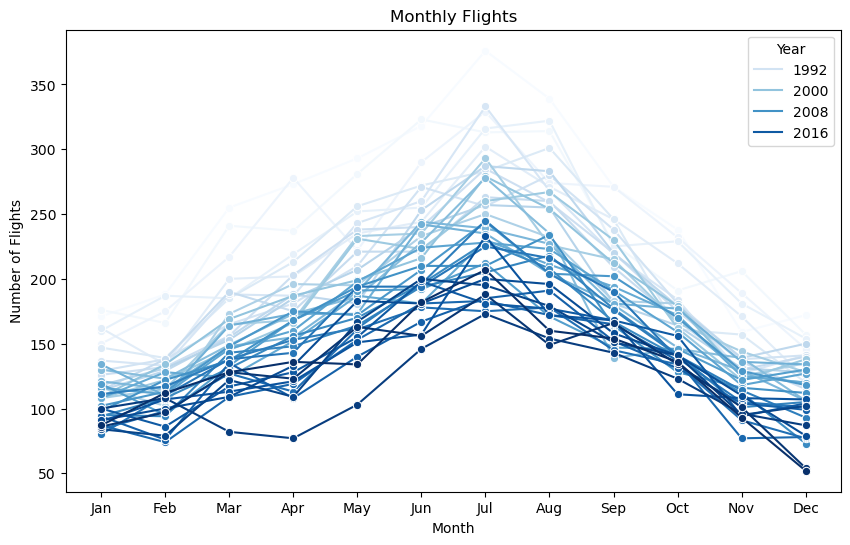

In [63]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

monthly_flights = df.groupby(['Year', 'Month'])['Event.Id'].nunique().reset_index()

# Create a line plot using Seaborn with blue lines
plt.figure(figsize=(10, 6))  # Set the figure size
lineplot = sns.lineplot(data=monthly_flights, x='Month', y='Event.Id', hue='Year', marker='o', palette='Blues')

plt.title('Monthly Flights')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
lineplot.legend(title='Year')
plt.grid(False)
plt.show()



In [914]:
df.to_csv('clean_Aviation_Data.csv')

In [81]:
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Make
Cessna      23331
Piper       12785
Beech        4638
Boeing       2589
Bell         2383
Robinson     1174
Mooney       1157
Grumman       888
Bellanca      860
Hughes        797
Name: count, dtype: int64

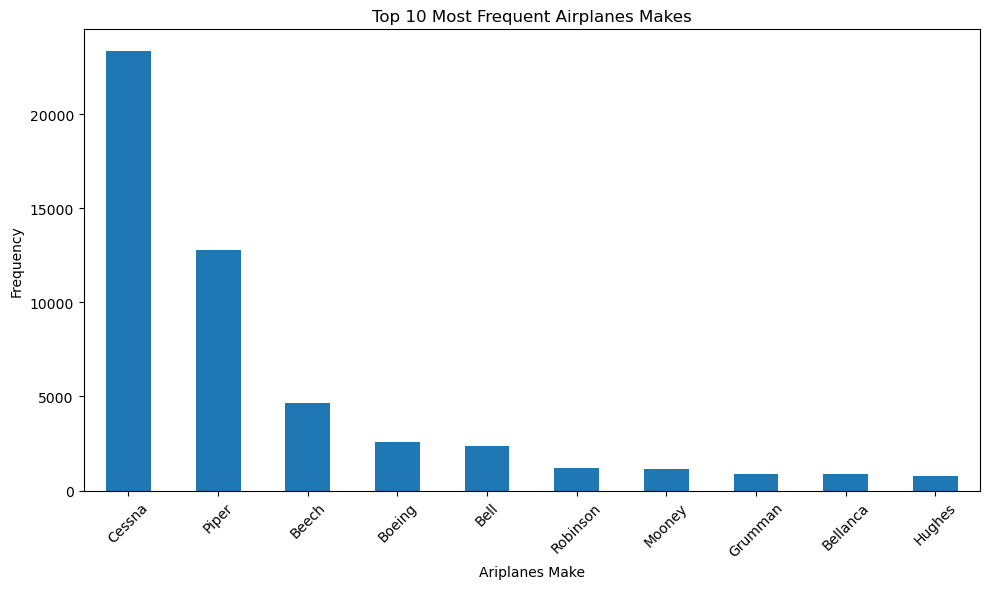

In [71]:
import matplotlib.pyplot as plt

# Assuming you have already performed the necessary data manipulations
# to get the top 10 most frequent car makes and their frequencies
top_airplanes_makes = df['Make'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_airplanes_makes.plot(kind='bar')
plt.title('Top 10 Most Frequent Airplanes Makes')
plt.xlabel('Ariplanes Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [80]:
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].str.title()
df['Broad.phase.of.flight'].value_counts().nlargest(10)

Broad.phase.of.flight
Landing        12732
Takeoff        10276
Cruise          8480
Maneuvering     6772
Approach        5423
Climb           1744
Descent         1643
Taxi            1602
Go-Around       1144
Standing         818
Name: count, dtype: int64

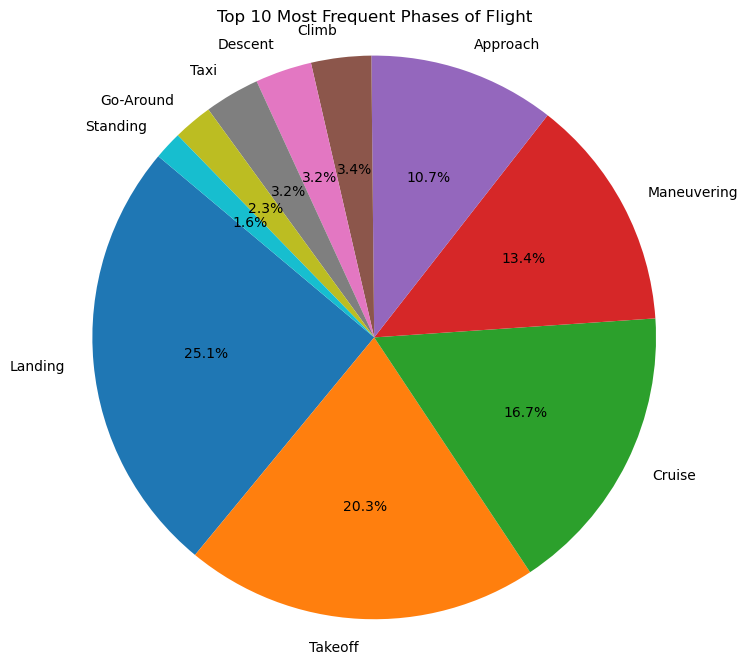

In [77]:
import matplotlib.pyplot as plt

# Assuming you've already processed the data to get the top 10 most frequent phases of flight and their frequencies
top_phases_of_flight = df['Broad.phase.of.flight'].value_counts().nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_phases_of_flight, labels=top_phases_of_flight.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Frequent Phases of Flight')

plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

plt.show()


In [83]:
df['Number.of.Engines'].value_counts().nlargest(10)

Number.of.Engines
1.0    60808
2.0     9659
0.0     1066
3.0      397
4.0      365
8.0        3
6.0        1
Name: count, dtype: int64

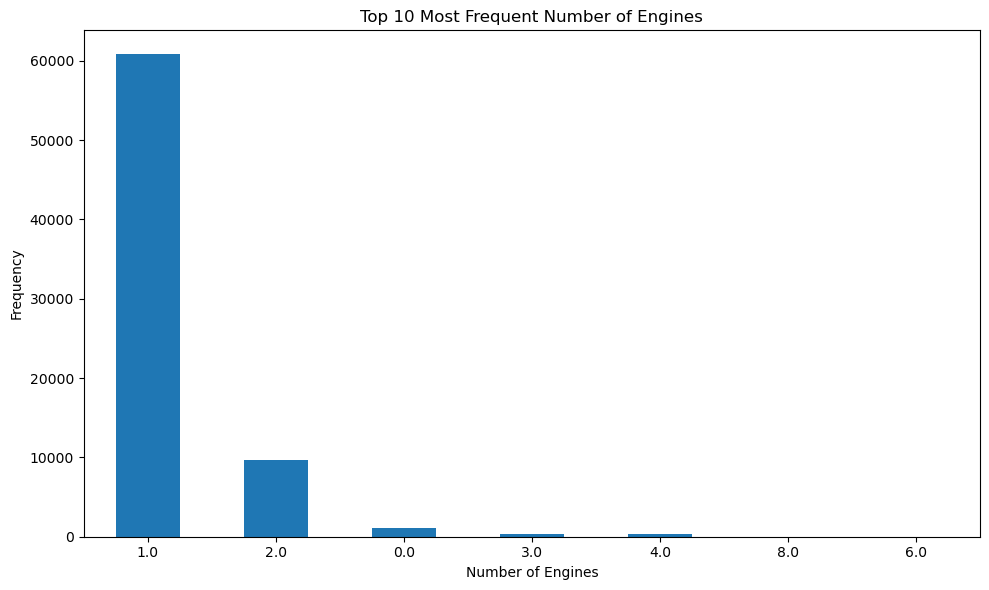

In [82]:
import matplotlib.pyplot as plt

# Assuming you've already processed the data to get the top 10 most frequent engine counts and their frequencies
top_engine_counts = df['Number.of.Engines'].value_counts().nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_engine_counts.plot(kind='bar')
plt.title('Top 10 Most Frequent Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # No need to rotate x-axis labels for discrete values

plt.tight_layout()
plt.show()
